# **Data Analysis with NY Airbnb Listings**

To showcase my data analysis skills in python, I am writing this data analysis script to: 

1. **Data Cleaning**: identify missing values or peculiatities in the data and fix them when possible. 
2. **Data Visualization**: Visualize the data and preexisting relationships between vvalues. 



## **Data Importing**

In [16]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [17]:
#setting up the working directory based on the location of this script
import os 
print(os.getcwd())
os.chdir('/Users/rebeccahess/Documents/projects/data_analytics/NY-airbnb')
os.listdir()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/rebeccahess/Documents/projects/data_analytics/NY-airbnb


['.DS_Store', 'iris_data.ipynb', 'NY-airbnb.ipynb', 'NY airbnb data']

In [18]:
#importing the data 
listings = pd.read_csv('NY airbnb data/listings.csv')
neighborhoods = pd.read_csv('NY airbnb data/neighbourhoods.csv')
reviews = pd.read_csv('NY airbnb data/reviews.csv')

## **Data Exploration**

**Data Exploration : Listings.csv**

In [19]:
listings.describe()
listings.info()


,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,4.240000e+02,4.240000e+02,0.0,424.000000,424.000000,374.000000,424.000000,424.000000,366.000000,424.000000,424.000000,424.000000,0.0
mean,6.907163e+17,2.386313e+08,NaN,42.657833,-73.776658,110.042781,5.693396,59.174528,1.987077,6.174528,233.261792,15.837264,NaN
std,5.017984e+17,1.959192e+08,NaN,0.009929,0.019287,86.746145,9.627107,106.754453,1.981654,6.372051,119.275432,21.751757,NaN
min,2.992450e+06,6.576000e+04,NaN,42.630660,-73.876490,24.000000,1.000000,0.000000,0.040000,1.000000,0.000000,0.000000,NaN
25%,5.196373e+07,4.762598e+07,NaN,42.652047,-73.789767,68.000000,1.000000,4.000000,0.490000,1.000000,119.750000,1.000000,NaN
50%,8.415244e+17,1.891330e+08,NaN,42.656976,-73.773065,93.000000,2.000000,19.000000,1.350000,3.000000,268.000000,7.000000,NaN
75%,1.128346e+18,3.976121e+08,NaN,42.663191,-73.763191,122.750000,3.000000,67.250000,2.942500,9.000000,341.250000,22.250000,NaN
max,1.365429e+18,6.773730e+08,NaN,42.714900,-73.738250,882.000000,70.000000,900.000000,10.980000,23.000000,365.000000,130.000000,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              424 non-null    int64  
 1   name                            424 non-null    object 
 2   host_id                         424 non-null    int64  
 3   host_name                       423 non-null    object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   424 non-null    object 
 6   latitude                        424 non-null    float64
 7   longitude                       424 non-null    float64
 8   room_type                       424 non-null    object 
 9   price                           374 non-null    float64
 10  minimum_nights                  424 non-null    int64  
 11  number_of_reviews               424 non-null    int64  
 12  last_review                     366 

In [20]:
#checking for missing values in columns 
pct_missing=pd.Series(listings.isnull().sum() / len(listings)) * 100
pct_missing[pct_missing > 0].sort_values(ascending=False)
pct_missing

#checking for missing values in rows
# we know that 100% are missing the neighbourhood_group and license do lets look at the other values 
# the question I am trying to answer is are the null values random or are they concentrated in certain rows. 
listings.loc[
    listings.isnull().sum(axis=1)>2, 
    pct_missing[pct_missing > 0].index
].drop(['license', 'neighbourhood_group'], axis=1).head(10)


#checking the number of missing values grouped in each row, excluding the neighbourhood_group and license columns
missing = listings.drop(columns=pct_missing[pct_missing == 100].index).isnull()
# Group by the set of missing columns
missing_sets = (missing.apply(lambda x: ", ".join(x[x].index), axis=1)
                .value_counts()
                .reset_index())
missing_sets.columns = ['missing_cols', 'count']

#pandas formatting options to display all columns and rows
pd.set_option('display.width', 0)            # No fixed width limit
pd.set_option('display.max_colwidth', None)  # Don't truncate column contents
print(missing_sets)

#it looks like the reviews data is missing as a group. Ths begs the question can the review data be supplemented with the reviews.csv.
#price is missing unrelated to reviews -- > This might just be because there are no reviews for the listing.

neighbourhood_group    100.000000
license                100.000000
last_review             13.679245
reviews_per_month       13.679245
price                   11.792453
host_name                0.235849
dtype: float64

id                                  0.000000
name                                0.000000
host_id                             0.000000
host_name                           0.235849
neighbourhood_group               100.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                              11.792453
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                        13.679245
reviews_per_month                  13.679245
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
license                           100.000000
dtype: float64

,host_name,price,last_review,reviews_per_month
15,Argus,243.0,NaN,NaN
18,Argus,180.0,NaN,NaN
19,Michael,155.0,NaN,NaN
21,Fabiola,37.0,NaN,NaN
22,Argus,186.0,NaN,NaN
23,Peter,NaN,2024-10-19,0.24
24,Jessica,NaN,2022-11-30,0.10
25,David,NaN,2022-12-31,0.08
26,Lloyd,NaN,2025-02-16,2.77
27,Allen,NaN,2025-02-17,1.59


                            missing_cols  count
0                                           323
1         last_review, reviews_per_month     50
2                                  price     42
3  price, last_review, reviews_per_month      8
4                              host_name      1


In [21]:
#checking for duplicates
listings['id'].duplicated() # not seeing any duplicates --> nothing to resolve


0      False
1      False
2      False
3      False
4      False
       ...  
419    False
420    False
421    False
422    False
423    False
Name: id, Length: 424, dtype: bool

**Data Exploration: neighbourhoods.csv**

In [22]:
reviews.describe()
reviews.info()
reviews.head(10)

#This data is already included in the listings data.

,listing_id
count,2.509000e+04
mean,2.305090e+17
std,3.980084e+17
min,2.992450e+06
25%,2.554956e+07
50%,4.426543e+07
75%,6.100908e+17
max,1.350872e+18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25090 entries, 0 to 25089
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   listing_id  25090 non-null  int64 
 1   date        25090 non-null  object
dtypes: int64(1), object(1)
memory usage: 392.2+ KB


,listing_id,date
0,2992450,2014-07-01
1,2992450,2014-10-24
2,2992450,2015-03-04
3,2992450,2015-03-25
4,2992450,2015-06-23
5,2992450,2015-07-19
6,2992450,2015-12-31
7,2992450,2021-09-22
8,2992450,2022-08-17
9,3820211,2014-08-15


**Data Exploration: neighbourhoods.csv**

In [23]:
neighborhoods.describe()
neighborhoods.info()
#so we are meant to pull neighbourhood_group from the neighbourhoods data.

print(neighborhoods['neighbourhood_group'].value_counts())
#nevermind this is not a useful column.
neighborhoods.head()
# same thing with the listings data, we have neightborhood but no neightborhood_group.
# but this means that all the heavy lifting has been done for us.

,neighbourhood_group
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        15 non-null     object 
dtypes: float64(1), object(1)
memory usage: 388.0+ bytes
Series([], Name: count, dtype: int64)


,neighbourhood_group,neighbourhood
0,NaN,EIGHTH WARD
1,NaN,ELEVENTH WARD
2,NaN,FIFTEENTH WARD
3,NaN,FIFTH WARD
4,NaN,FIRST WARD


In [24]:
# now for a decisive moment on whether to remove the data with missing values. The question is do we care about reviews and price?
# I think we do care about reviews and price.
# so we will remove the rows with missing values.
# we will also remove the columns with 100% missing values.

#lets look at the data again to confirm data types while we are moving towards the final data set.
listings.info()
listings.describe()
listings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              424 non-null    int64  
 1   name                            424 non-null    object 
 2   host_id                         424 non-null    int64  
 3   host_name                       423 non-null    object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   424 non-null    object 
 6   latitude                        424 non-null    float64
 7   longitude                       424 non-null    float64
 8   room_type                       424 non-null    object 
 9   price                           374 non-null    float64
 10  minimum_nights                  424 non-null    int64  
 11  number_of_reviews               424 non-null    int64  
 12  last_review                     366 

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,4.240000e+02,4.240000e+02,0.0,424.000000,424.000000,374.000000,424.000000,424.000000,366.000000,424.000000,424.000000,424.000000,0.0
mean,6.907163e+17,2.386313e+08,NaN,42.657833,-73.776658,110.042781,5.693396,59.174528,1.987077,6.174528,233.261792,15.837264,NaN
std,5.017984e+17,1.959192e+08,NaN,0.009929,0.019287,86.746145,9.627107,106.754453,1.981654,6.372051,119.275432,21.751757,NaN
min,2.992450e+06,6.576000e+04,NaN,42.630660,-73.876490,24.000000,1.000000,0.000000,0.040000,1.000000,0.000000,0.000000,NaN
25%,5.196373e+07,4.762598e+07,NaN,42.652047,-73.789767,68.000000,1.000000,4.000000,0.490000,1.000000,119.750000,1.000000,NaN
50%,8.415244e+17,1.891330e+08,NaN,42.656976,-73.773065,93.000000,2.000000,19.000000,1.350000,3.000000,268.000000,7.000000,NaN
75%,1.128346e+18,3.976121e+08,NaN,42.663191,-73.763191,122.750000,3.000000,67.250000,2.942500,9.000000,341.250000,22.250000,NaN
max,1.365429e+18,6.773730e+08,NaN,42.714900,-73.738250,882.000000,70.000000,900.000000,10.980000,23.000000,365.000000,130.000000,NaN


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,621960198566758900,The Historic Jesse Buel Farmhouse w/ Heated Pool,382970529,Thomas,NaN,FOURTEENTH WARD,42.66762,-73.79919,Entire home/apt,882.0,1,15,2025-02-06,0.47,12,330,8,NaN
1,932642358896439621,Stylish top floor apt w/parking,232967878,Diana,NaN,THIRTEENTH WARD,42.67224,-73.79301,Entire home/apt,106.0,1,37,2025-02-15,1.88,23,86,26,NaN
2,53567589,Private Garden Apt in Downtown Albany|Pets Allowed,433096110,Brian,NaN,SIXTH WARD,42.65204,-73.76655,Entire home/apt,99.0,1,251,2025-02-23,6.40,4,341,73,NaN
3,20671966,The Metropolitan,98744672,Bela,NaN,NINTH WARD,42.65532,-73.78244,Entire home/apt,58.0,2,46,2025-01-19,0.51,8,248,7,NaN
4,24606880,The Western Suite,98744672,Bela,NaN,NINTH WARD,42.65431,-73.78178,Private room,50.0,2,48,2025-02-27,0.62,8,340,9,NaN


## **Data Cleaning**

* Resolving missing data.

* Columns I want to remove:
    1. neighbourhood_group
    2. license 

* I want to make the index the id. 

* **Imputation**: Host id would be a valuable way to calculate the number of airbnb's by host name is not likely to be unique like host_id. 

    * We could use host id and location to forward fill price, forward filling reviews is debatable. 

    * maybe first identify whether there is a preexisting relationship between **host_id** and **price** 

* Remove duplicate data.

* It would be helpful to turn string variables into categorical data.
    * neighborhood 
    * room_type

* **Feature generation**: Without visualizing the data, one metric I am interested in is time since last review. I am going to calculate time since the maximum date of the last review. I am choosing not to use present day because I do not know when they data was last updated.


#### <u> Missing Data </u>


In [25]:
#removing the columns with 100% missing values
#I am going to call the new data set listings_clean
listings_clean = listings.drop(columns=['license', 'neighbourhood_group'])

#### <u> Setting the index </u>

In [26]:
#setting id to be the index
listings_clean = listings_clean.set_index('id')

#### <u> Data Imputation </u>

In [27]:
#looking for a relationship between price and the other columns
missing_or_zero_count = (listings_clean['price'].isnull() | (listings_clean['price'] == 0)).sum()

print(missing_or_zero_count) 
#those are the rows with missing values in the price column.

# Step 1: Find host_ids that have at least one missing listing, this is a list of host_ids
hosts_with_missing = listings_clean[listings_clean['price'].isnull()]['host_id'].unique()

# Step 2: Keep ALL listings for these host_ids
listings_missing_hosts = listings_clean.loc[
    listings_clean['host_id'].isin(hosts_with_missing), ['price', 'host_id', 'neighbourhood', 'room_type']
].sort_values(by='host_id')

# not very helpful. We cant see that much of a correlation with limited view.
#calculate some summary statistics for the listings with missing host_ids. 

listings_clean.groupby(['neighbourhood', 'room_type'])['price'].agg(['count', 'mean', 'std', 'min', 'max']).reset_index().sort_values(by='mean', ascending=True)
#too much variation in the data to make any conclusions. Lets just drop the rows with missing values.
listings_clean = listings_clean.dropna(subset=['price'])
print(listings_missing_hosts)  



50


,neighbourhood,room_type,count,mean,std,min,max
5,FIFTEENTH WARD,Private room,3,42.000000,4.582576,38.0,47.0
3,ELEVENTH WARD,Private room,7,43.571429,9.071147,32.0,55.0
18,SEVENTH WARD,Private room,1,50.000000,NaN,50.0,50.0
24,THIRD WARD,Private room,5,51.800000,24.355697,36.0,92.0
28,TWELFTH WARD,Private room,1,54.000000,NaN,54.0,54.0
10,FOURTEENTH WARD,Private room,10,60.800000,7.997222,52.0,70.0
1,EIGHTH WARD,Private room,3,62.333333,16.165808,53.0,81.0
14,NINTH WARD,Private room,14,62.785714,31.894486,24.0,134.0
26,THIRTEENTH WARD,Private room,17,63.000000,25.541633,36.0,123.0
22,TENTH WARD,Private room,22,68.954545,42.371910,33.0,186.0


                     price    host_id    neighbourhood        room_type
id                                                                     
1121699903906738345   90.0    1761578       SIXTH WARD  Entire home/apt
653433851241162365   130.0    1761578       SIXTH WARD  Entire home/apt
849460179246794510     NaN    1761578       SIXTH WARD  Entire home/apt
703551649845095095     NaN    3650672  THIRTEENTH WARD  Entire home/apt
21449583             582.0    4259750   FIFTEENTH WARD  Entire home/apt
...                    ...        ...              ...              ...
1018268869882592471  102.0  528617680      SECOND WARD  Entire home/apt
950613505102507073     NaN  529844022       FIRST WARD  Entire home/apt
1108060100336766656    NaN  539608284       THIRD WARD     Private room
1142828940864329671    NaN  574235481       FIRST WARD  Entire home/apt
1284983740417509877    NaN  661066080      FOURTH WARD  Entire home/apt

[125 rows x 4 columns]


#### <u> Data Type Corrections </u>

In [28]:
# I am doing a manual enocoding of the neighbourhood column. This way interpretation of the data is easier.
listings_clean['neighbourhood'].unique()
neighbourhood_map = pd.DataFrame({
    'neighbourhood': ['FIRST WARD', 'SECOND WARD', 'THIRD WARD', 'FOURTH WARD', 'FIFTH WARD', 'SIXTH WARD', 'SEVENTH WARD', 'EIGHTH WARD', 'NINTH WARD', 'TENTH WARD', 'ELEVENTH WARD', 'TWELFTH WARD', 'THIRTEENTH WARD', 'FOURTEENTH WARD', 'FIFTEENTH WARD'],
    'neighbourhood_encoded': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
})
listings_clean = listings_clean.merge(pd.DataFrame(neighbourhood_map), on='neighbourhood', how='left')
listings_clean['neighbourhood_encoded'] = listings_clean['neighbourhood_encoded'].astype('int')


array(['FOURTEENTH WARD', 'THIRTEENTH WARD', 'SIXTH WARD', 'NINTH WARD',
       'TENTH WARD', 'TWELFTH WARD', 'SEVENTH WARD', 'FIFTH WARD',
       'EIGHTH WARD', 'THIRD WARD', 'FIFTEENTH WARD', 'SECOND WARD',
       'ELEVENTH WARD', 'FOURTH WARD', 'FIRST WARD'], dtype=object)

In [29]:
# convert categorical variables 
listings_clean['room_type_encoded'] = listings_clean['room_type'].astype('category')

#encode categorical variables
listings_clean['room_type_encoded'] = listings_clean['room_type_encoded'].cat.codes
listings_clean['room_type_encoded'] = listings_clean['room_type_encoded'].astype('int')


In [30]:
#convert date time variables 
listings_clean['last_review'] = pd.to_datetime(listings_clean['last_review'], format='%Y-%m-%d')

In [31]:
# to avoid using identifiers in the analysis, I'm going to convert them to objects. 
listings_clean['host_id'] = listings_clean['host_id'].astype(object)

In [32]:
#checking my work 
listings_clean.head()
listings_clean.info()


,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_encoded,room_type_encoded
0,The Historic Jesse Buel Farmhouse w/ Heated Pool,382970529,Thomas,FOURTEENTH WARD,42.66762,-73.79919,Entire home/apt,882.0,1,15,2025-02-06,0.47,12,330,8,13,0
1,Stylish top floor apt w/parking,232967878,Diana,THIRTEENTH WARD,42.67224,-73.79301,Entire home/apt,106.0,1,37,2025-02-15,1.88,23,86,26,12,0
2,Private Garden Apt in Downtown Albany|Pets Allowed,433096110,Brian,SIXTH WARD,42.65204,-73.76655,Entire home/apt,99.0,1,251,2025-02-23,6.40,4,341,73,5,0
3,The Metropolitan,98744672,Bela,NINTH WARD,42.65532,-73.78244,Entire home/apt,58.0,2,46,2025-01-19,0.51,8,248,7,8,0
4,The Western Suite,98744672,Bela,NINTH WARD,42.65431,-73.78178,Private room,50.0,2,48,2025-02-27,0.62,8,340,9,8,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            374 non-null    object        
 1   host_id                         374 non-null    object        
 2   host_name                       373 non-null    object        
 3   neighbourhood                   374 non-null    object        
 4   latitude                        374 non-null    float64       
 5   longitude                       374 non-null    float64       
 6   room_type                       374 non-null    object        
 7   price                           374 non-null    float64       
 8   minimum_nights                  374 non-null    int64         
 9   number_of_reviews               374 non-null    int64         
 10  last_review                     324 non-null    datetime64[ns]
 11  review

#### <u> Feature generation </u>

In [33]:
max_date = listings_clean['last_review'].max()
listings_clean['time_since_lr']=listings_clean['last_review'].apply(lambda x: (max_date - x).days)
#checking the data types again
listings_clean.info()
#checking the data again
listings_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            374 non-null    object        
 1   host_id                         374 non-null    object        
 2   host_name                       373 non-null    object        
 3   neighbourhood                   374 non-null    object        
 4   latitude                        374 non-null    float64       
 5   longitude                       374 non-null    float64       
 6   room_type                       374 non-null    object        
 7   price                           374 non-null    float64       
 8   minimum_nights                  374 non-null    int64         
 9   number_of_reviews               374 non-null    int64         
 10  last_review                     324 non-null    datetime64[ns]
 11  review

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_encoded,room_type_encoded,time_since_lr
0,The Historic Jesse Buel Farmhouse w/ Heated Pool,382970529,Thomas,FOURTEENTH WARD,42.66762,-73.79919,Entire home/apt,882.0,1,15,2025-02-06,0.47,12,330,8,13,0,23.0
1,Stylish top floor apt w/parking,232967878,Diana,THIRTEENTH WARD,42.67224,-73.79301,Entire home/apt,106.0,1,37,2025-02-15,1.88,23,86,26,12,0,14.0
2,Private Garden Apt in Downtown Albany|Pets Allowed,433096110,Brian,SIXTH WARD,42.65204,-73.76655,Entire home/apt,99.0,1,251,2025-02-23,6.40,4,341,73,5,0,6.0
3,The Metropolitan,98744672,Bela,NINTH WARD,42.65532,-73.78244,Entire home/apt,58.0,2,46,2025-01-19,0.51,8,248,7,8,0,41.0
4,The Western Suite,98744672,Bela,NINTH WARD,42.65431,-73.78178,Private room,50.0,2,48,2025-02-27,0.62,8,340,9,8,1,2.0


## **Data Visualization**

Now that I have resolved the missing data for price and removed unhelpful / empty columns, we can start with some visualization.
The first thing I think would be interesting is a correlation map -- lets see if there are any relationships between columsn. 

I think it would be interesting to see the prices per area using a geographic map. 



In [34]:
#lets look at some bar charts to see the distribution of the data
numeric_listings = listings_clean[listings_clean.select_dtypes(include=['int', 'float', 'category']).columns]
numeric_listings.describe()


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_encoded,room_type_encoded,time_since_lr
count,374.000000,374.000000,374.000000,374.000000,374.000000,324.000000,374.000000,374.000000,374.000000,374.000000,374.000000,324.000000
mean,42.657138,-73.776430,110.042781,5.582888,63.850267,2.098241,6.200535,245.893048,17.034759,6.489305,0.270053,107.058642
std,0.009573,0.019307,86.746145,9.379821,112.085323,2.043552,6.275609,110.345664,22.700199,4.065634,0.444582,229.773868
min,42.630660,-73.876490,24.000000,1.000000,0.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.651610,-73.789175,68.000000,1.000000,4.000000,0.500000,1.000000,153.000000,1.000000,3.000000,0.000000,13.000000
50%,42.656369,-73.771815,93.000000,2.000000,22.000000,1.440000,3.000000,281.500000,8.000000,5.000000,0.000000,32.500000
75%,42.662445,-73.762749,122.750000,3.000000,73.500000,3.027500,9.000000,345.000000,23.000000,9.000000,1.000000,112.000000
max,42.714900,-73.738250,882.000000,70.000000,900.000000,10.980000,23.000000,365.000000,130.000000,14.000000,1.000000,2409.000000


<Figure size 1200x800 with 0 Axes>

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>],
       [<Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>],
       [<Axes: title={'center': 'neighbourhood_encoded'}>,
        <Axes: title={'center': 'room_type_encoded'}>,
        <Axes: title={'center': 'time_since_lr'}>]], dtype=object)

Text(0.5, 0.98, 'Distribution of Numeric Variables')

<Figure size 1200x800 with 0 Axes>

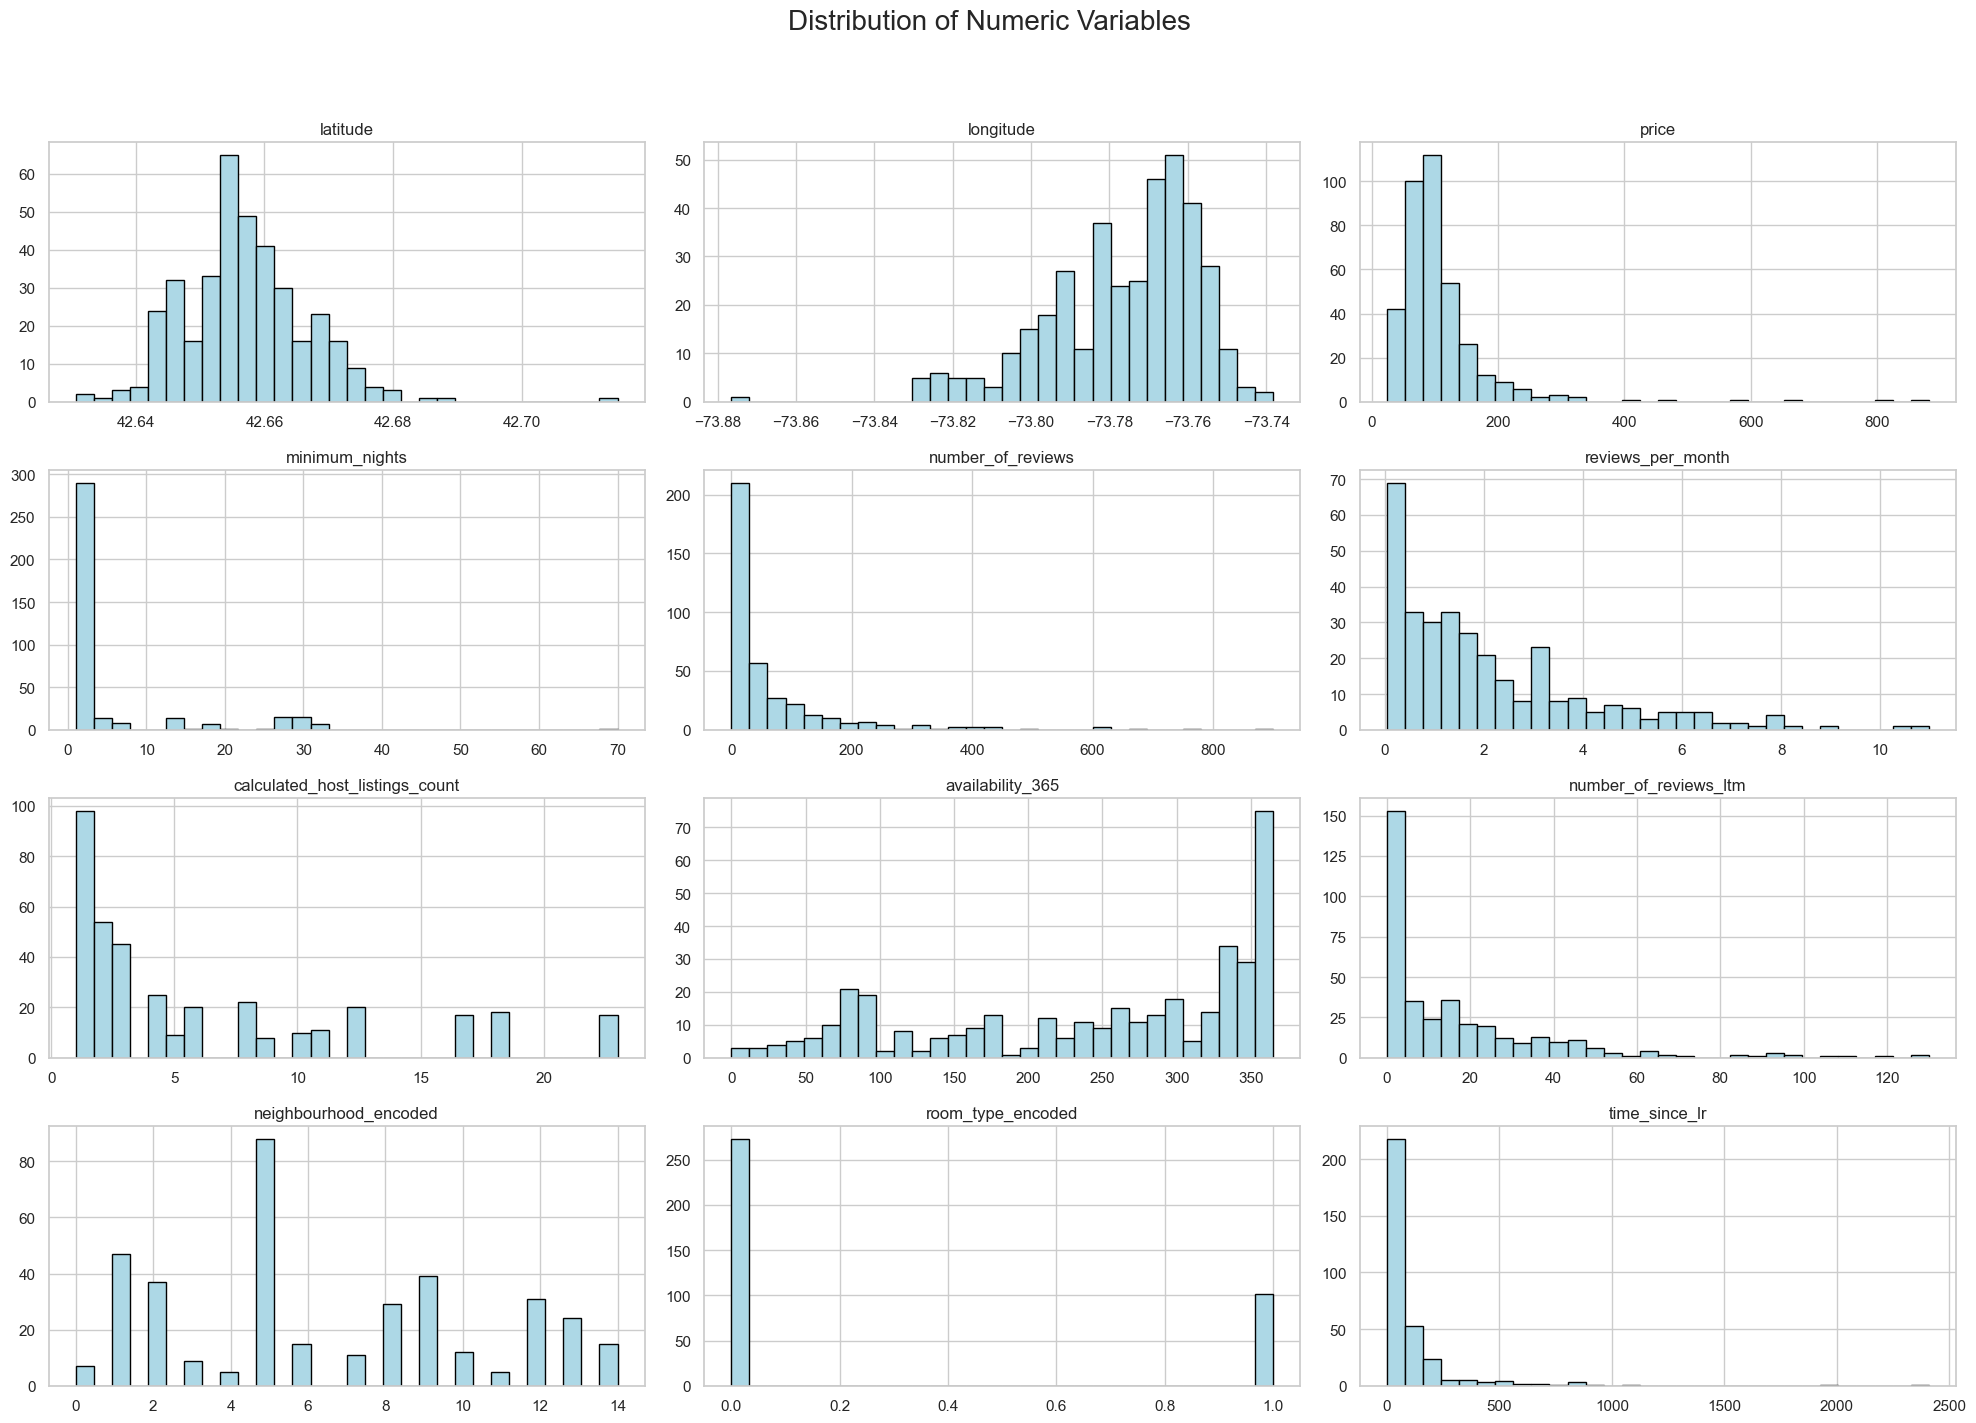

In [35]:
# lets do some distribution plots to see the distribution of the data
#setting the style of the plots
sns.set(style="whitegrid")
#setting the figure size
plt.figure(figsize=(12, 8))
#setting the color palette
sns.set_palette("pastel")
#setting the font size
plt.rcParams.update({'font.size': 14})
#setting the font family
plt.rcParams.update({'font.family': 'sans-serif'})

numeric_listings.hist(bins=30, figsize=(20, 15), color='lightblue', edgecolor='black')
plt.suptitle('Distribution of Numeric Variables', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Figure size 1200x1000 with 0 Axes>

<Axes: >

/var/folders/mj/4mjb49y145s6l4jx6ds13c0r0000gn/T/ipykernel_696/2336196376.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=listings_clean, x='price', y='neighbourhood', palette='pastel')


<Axes: xlabel='price', ylabel='neighbourhood'>

Text(0.5, 1.0, 'Box Plot of Price in each Ward')

Text(0, 0.5, 'Ward')

<Axes: >

/var/folders/mj/4mjb49y145s6l4jx6ds13c0r0000gn/T/ipykernel_696/2336196376.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=listings_clean, x='price', y='room_type', palette='pastel')


<Axes: xlabel='price', ylabel='room_type'>

Text(0.5, 1.0, 'Box Plot of Price in each Room Type')

Text(530.8977272727271, 0.5, 'Room Type')

Text(0.5, 497.25, 'Price (USD)')

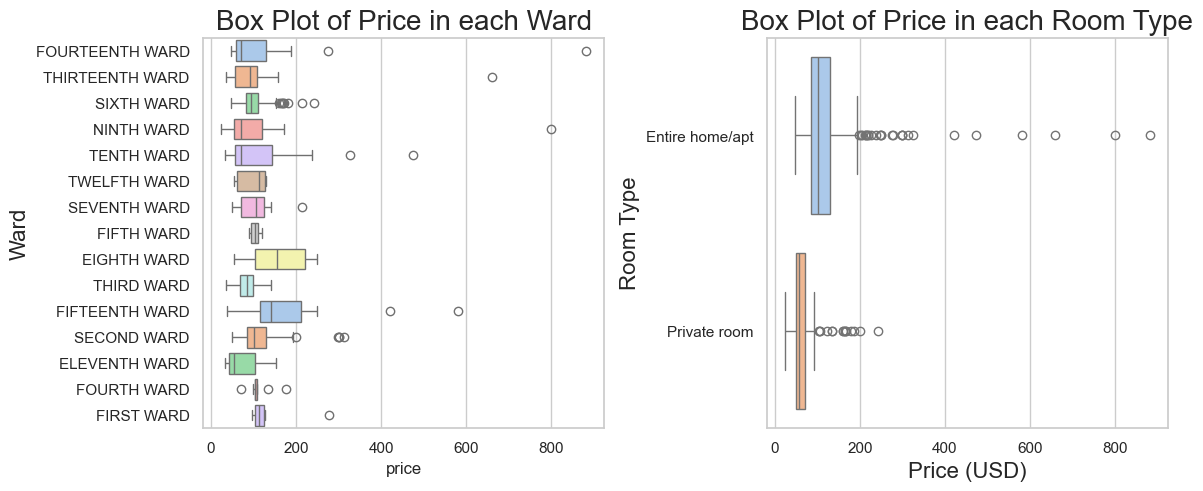

In [36]:
#box plots to see the distribution of the data
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.boxplot(data=listings_clean, x='price', y='neighbourhood', palette='pastel')
plt.title('Box Plot of Price in each Ward', fontsize=20)
plt.ylabel('Ward', fontsize=16)


plt.subplot(2, 2, 2)
sns.boxplot(data=listings_clean, x='price', y='room_type', palette='pastel')
plt.title('Box Plot of Price in each Room Type', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.ylabel('Room Type', fontsize=16)
plt.xlabel('Price (USD)', fontsize=16)
plt.show()
#correlation matrix to see the correlation between the variables


#### Conclusion 
We have some skewed distributions. Some with right skew are number of reviews, reviews per month, time since last review, price. Availability looks to be a bit left skewed. Minimum nights remains low for the majority of rentals. 

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Listings Data')

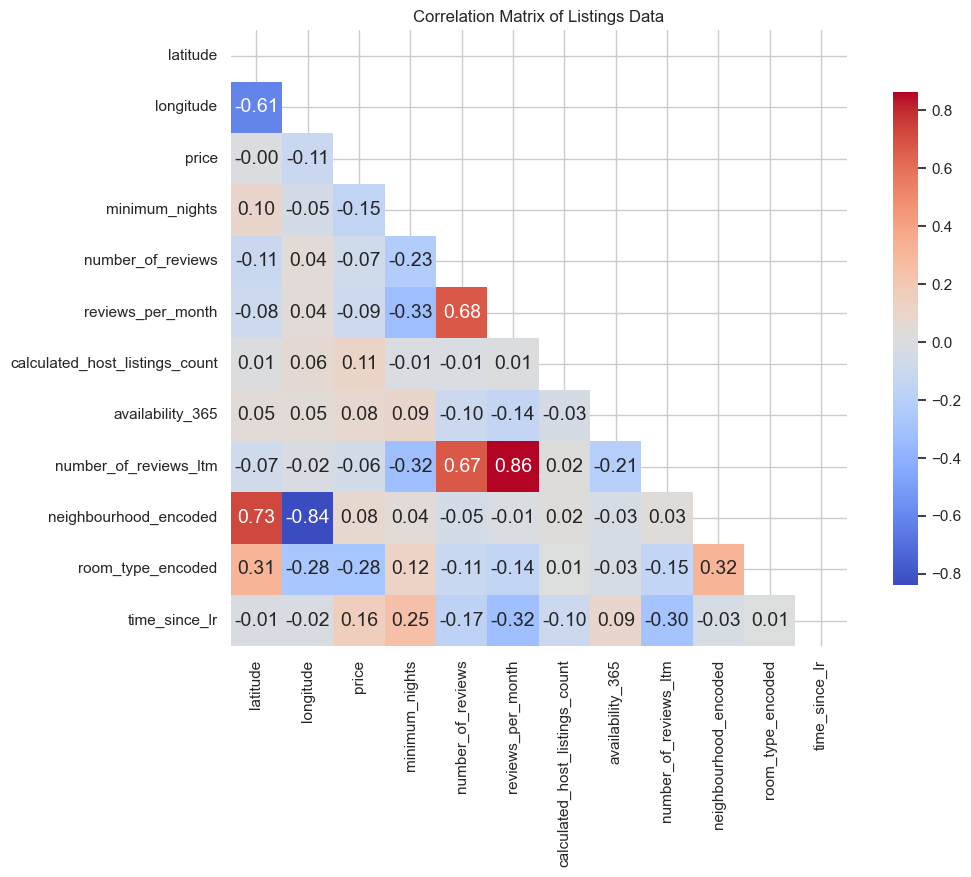

In [37]:
#constructing a correlation matrix to see if there are any relationships between the columns
#select only the numeric columns for the correlation matrix
corr_matrix = numeric_listings.corr()

plt.figure(figsize=(12, 8))
# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Listings Data')
plt.show()


#### Analysis 
After adjusting for the data types there is more that we can infer from the correlation map. There are some correlations we expect to see like longitude and latitude are highly correlated with neighborhood and reviews per month are highly correlated with number of reviews. 

After some deliberation one can conclude it makes sense that minimum nights is correlated with number of reviews. The higher the minimum nights requirement will result in a lower overall number of reviews over time. 

We hope to identify a relationship with price. Variables seem to have a lower correlation with price, but the highest correlations are: minimum nights, time since last review. 
* minimum nights is negatively correlated with price meaning as the price becomes higher, the minimum nights required becomes lower. This is intuitive as well because people are willing to pay for flexibility. 
* time since last review is positively correlated with price. This is likely to the common negative bias in reviews. A high price is likely to associated with higher quality in which renters are likely to be more satisfied with the rental and not feel inclined to provide feedback. 


This plot was more for fun. I am attempting to plot all of the airbnb's by price onto a map of albany, NY. Finding an Albany, NY map is a bit challenging. 

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_encoded,room_type_encoded,time_since_lr,geometry
0,The Historic Jesse Buel Farmhouse w/ Heated Pool,382970529,Thomas,FOURTEENTH WARD,42.667620,-73.799190,Entire home/apt,882.0,1,15,2025-02-06,0.47,12,330,8,13,0,23.0,POINT (-73.79919 42.66762)
1,Stylish top floor apt w/parking,232967878,Diana,THIRTEENTH WARD,42.672240,-73.793010,Entire home/apt,106.0,1,37,2025-02-15,1.88,23,86,26,12,0,14.0,POINT (-73.79301 42.67224)
2,Private Garden Apt in Downtown Albany|Pets Allowed,433096110,Brian,SIXTH WARD,42.652040,-73.766550,Entire home/apt,99.0,1,251,2025-02-23,6.40,4,341,73,5,0,6.0,POINT (-73.76655 42.65204)
3,The Metropolitan,98744672,Bela,NINTH WARD,42.655320,-73.782440,Entire home/apt,58.0,2,46,2025-01-19,0.51,8,248,7,8,0,41.0,POINT (-73.78244 42.65532)
4,The Western Suite,98744672,Bela,NINTH WARD,42.654310,-73.781780,Private room,50.0,2,48,2025-02-27,0.62,8,340,9,8,1,2.0,POINT (-73.78178 42.65431)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,COZY house,667142820,Sylvain Marco,FIFTEENTH WARD,42.669459,-73.826925,Entire home/apt,250.0,30,0,NaT,NaN,1,364,0,14,0,NaN,POINT (-73.82692 42.66946)
370,Short term across from UAlbany,658588120,Melinda,TWELFTH WARD,42.686851,-73.814056,Entire home/apt,60.0,28,0,NaT,NaN,1,267,0,11,0,NaN,POINT (-73.81406 42.68685)
371,Cozy Home in Heart of Albany,677372979,Celia,TWELFTH WARD,42.685078,-73.797640,Entire home/apt,129.0,2,0,NaT,NaN,1,200,0,11,0,NaN,POINT (-73.79764 42.68508)
372,"1 Bedroom on Lincoln Park, near Lark and Downtown",65414985,James,SEVENTH WARD,42.649600,-73.767920,Entire home/apt,77.0,2,27,2025-02-16,1.18,2,332,18,6,0,13.0,POINT (-73.76792 42.6496)


<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Albany Listings by Price and Neighbourhood')

Text(0.5, 167.07014637137266, 'Longitude')

Text(84.49999999999999, 0.5, 'Latitude')

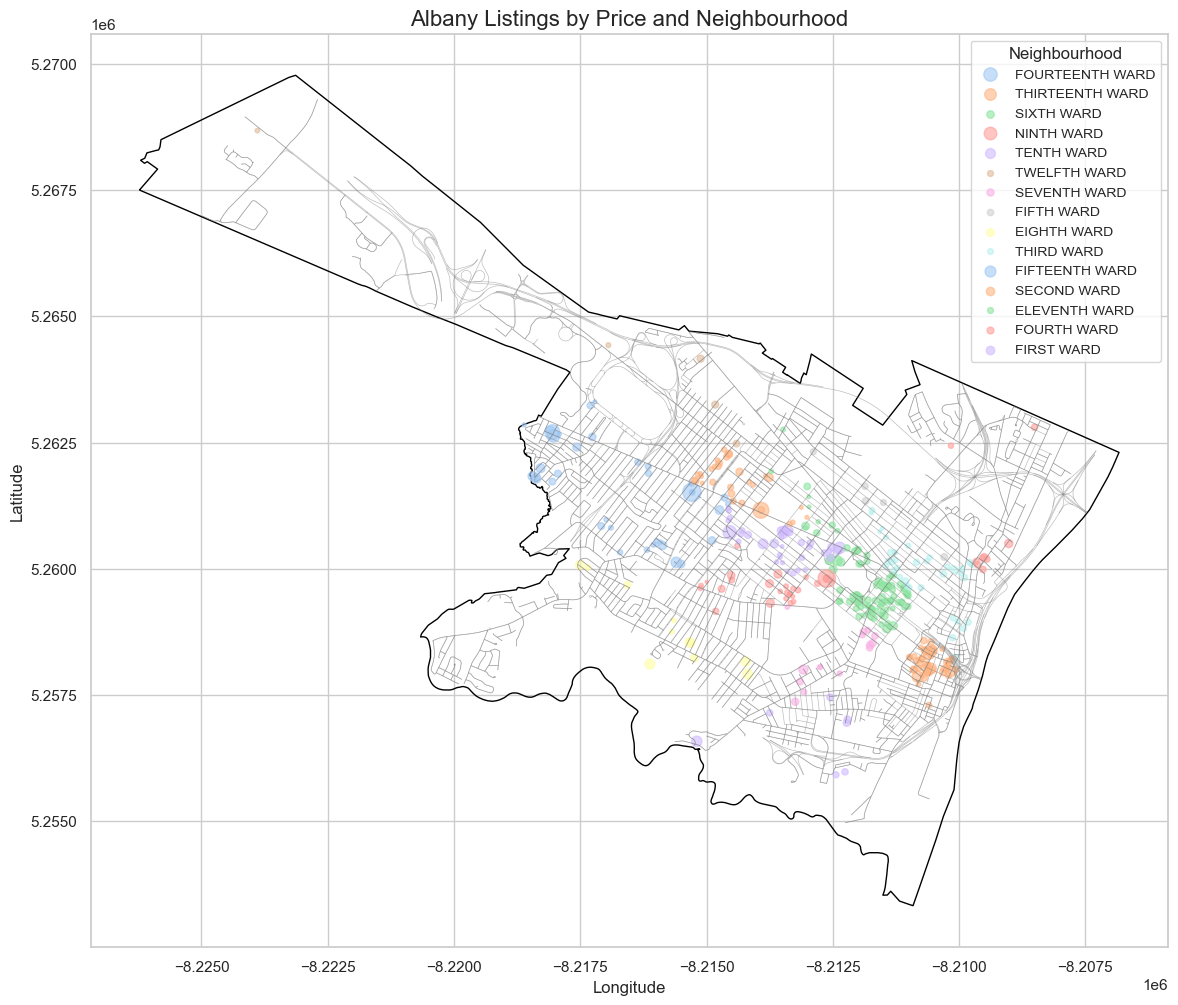

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx  # Optional: for adding basemap
import osmnx as ox

# ----------------------------
# 1. Load Albany city boundary and streets
# ----------------------------
albany_boundary = ox.geocode_to_gdf("Albany, New York, USA")
streets = ox.graph_from_place("Albany, New York, USA", network_type="drive")
edges = ox.graph_to_gdfs(streets, nodes=False)

# ----------------------------
# 2. Load and prepare your listings data
# ----------------------------

# Replace this with your actual cleaned listings DataFrame
# Example placeholder: listings_clean = pd.read_csv("albany_listings.csv")
# It must include columns: 'longitude', 'latitude', 'price', 'neighbourhood'

# Create geometry from lat/lon
geometry = [Point(xy) for xy in zip(listings_clean['longitude'], listings_clean['latitude'])]
listings_gdf = gpd.GeoDataFrame(listings_clean, geometry=geometry)
listings_gdf.set_crs(epsg=4326, inplace=True)

# ----------------------------
# 3. Plot the listings by neighbourhood
# ----------------------------
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the Albany boundary
albany_boundary.to_crs(epsg=3857).plot(ax=ax, color='none', edgecolor='black', linewidth=1)

# Plot street edges
edges.to_crs(epsg=3857).plot(ax=ax, linewidth=0.5, color='gray', alpha=0.5)

# Convert listings to Web Mercator for basemap compatibility
listings_gdf = listings_gdf.to_crs(epsg=3857)

# Plot each neighborhood with a different color
neighbourhoods = listings_gdf['neighbourhood'].unique()
for neighbourhood in neighbourhoods:
    subset = listings_gdf[listings_gdf['neighbourhood'] == neighbourhood]
    subset.plot(
        ax=ax,
        markersize=subset['price'] / 5,  # Adjust marker size based on price
        label=neighbourhood,
        alpha=0.6
    )

# Optional basemap (from contextily)

# Final plot adjustments
plt.title('Albany Listings by Price and Neighbourhood', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood', fontsize=10, title_fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()
